In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Start on geological data
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import glob
import os
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os


def load_images_from_directory(directory):
    images = []
    labels = []
    class_labels = {}
    class_label = 0
    for class_name in sorted(glob.glob(os.path.join(directory, '*'))):
        if os.path.isdir(class_name):
            class_labels[os.path.basename(class_name)] = class_label
            for filename in glob.glob(os.path.join(class_name, '*.jpg')) + glob.glob(os.path.join(class_name, '*.png')):
                image = Image.open(filename)
                # Resize image to desired dimensions
                image = image.resize((32, 32))  # Adjust dimensions as needed
                image = np.array(image)
                images.append(image)
                labels.append(class_label)
            class_label += 1
    return np.array(images), np.array(labels), class_labels


In [ ]:
# STARTING OF THE PROJECT

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
# Local dataset URL
dataset_url = "/content/drive/MyDrive/EHS"
# Extract the dataset
dir_of_data = pathlib.Path(dataset_url)

In [ ]:
image_count = len(list(dir_of_data.glob('*/*.jpg')))
print(image_count)

1252


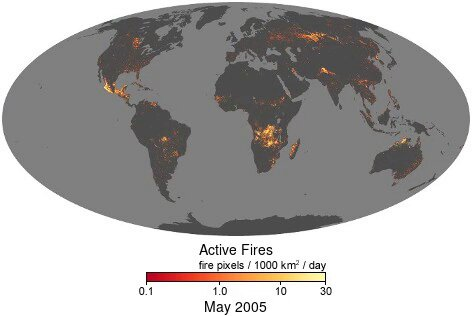

In [ ]:
roses = list(dir_of_data.glob('Fire/*'))
PIL.Image.open(str(roses[1]))

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(dir_of_data,
  subset="training",
  seed=123,validation_split=0.2,
  image_size=(180, 180),
  batch_size=32)

Found 1605 files belonging to 5 classes.
Using 1284 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(dir_of_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 1605 files belonging to 5 classes.
Using 321 files for validation.


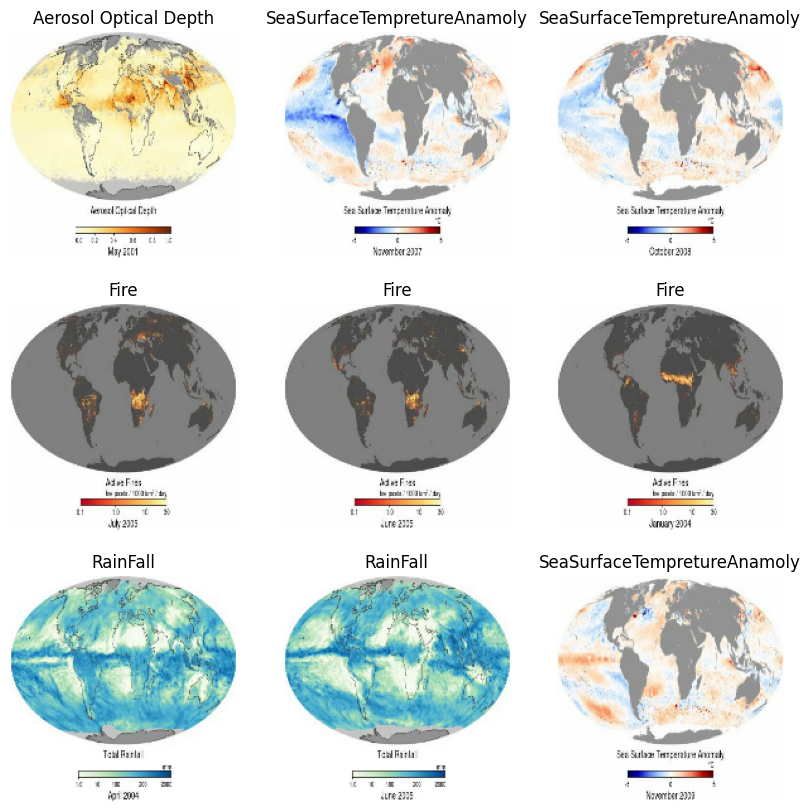

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

In [ ]:
history = model.fit(train_ds,validation_data=val_ds,
                    epochs=15)

41/41 [==============================] - 58s 1s/step - loss: 0.0209 - accuracy: 0.9953 - val_loss: 0.0050 - val_accuracy: 1.0000


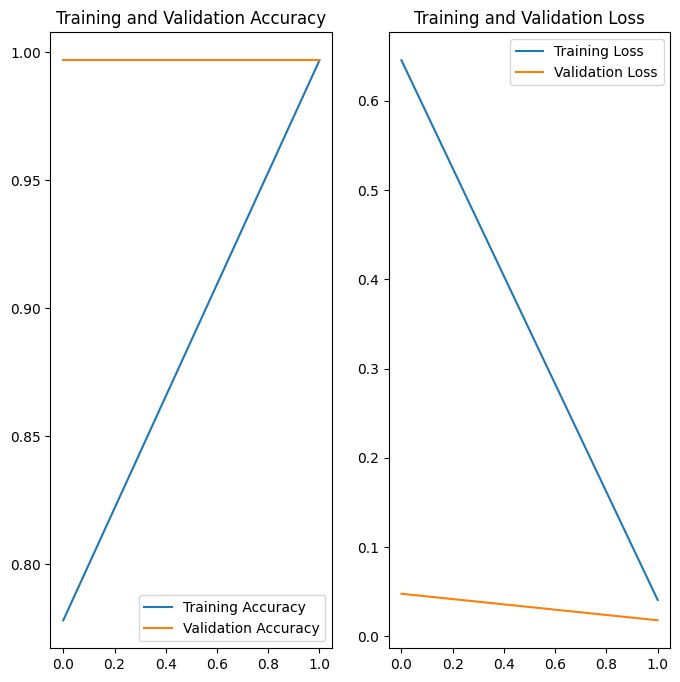

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
path = r"MOP_CO_M_000.jpg"
img = tf.keras.utils.load_img(
    path, target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 385ms/step
This image most likely belongs to CMO with a 100.00 percent confidence.


In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np
import cv2
import glob


# compare to images and their similarities
def compare_images(imageA, imageB):
    # compute structural similarity
    s = ssim(imageA, imageB)
    return s


# Get a list of all the image in the current directory in CMO files
CarbonMonoOxide_files = glob.glob("/content/drive/MyDrive/EHS/CMO/CarbonMonoOxide/*.jpg")
CMO_I_SIZE = len(CarbonMonoOxide_files)
print(CMO_I_SIZE)
cmo_changes = []
for P_Index in range(CMO_I_SIZE - 1):
    # Load the image
    PH_ONE = cv2.imread(CarbonMonoOxide_files[P_Index])
    PH_TWO = cv2.imread(CarbonMonoOxide_files[P_Index + 1])
    # Convert colored image to gray
    ONE_P = cv2.cvtColor(PH_ONE, cv2.COLOR_BGR2GRAY)
    TWO_C = cv2.cvtColor(PH_TWO, cv2.COLOR_BGR2GRAY)

    cmo_changes.append(compare_images(ONE_P, TWO_C))

print('Cmo:', sum(cmo_changes) / CMO_I_SIZE)


# # Get a list of all the image in the current directory in RainFall files
RainFall_files = glob.glob(r"/content/drive/MyDrive/EHS/RainFall/*.jpg")

RF_I_SIZE = len(RainFall_files)
rf_changes = []
for P_Index in range(RF_I_SIZE - 1):
    # Load the image
    PH_ONE = cv2.imread(RainFall_files[P_Index])
    PH_TWO = cv2.imread(RainFall_files[P_Index + 1])
    # Convert colored image to gray
    ONE_P = cv2.cvtColor(PH_ONE, cv2.COLOR_BGR2GRAY)
    TWO_C = cv2.cvtColor(PH_TWO, cv2.COLOR_BGR2GRAY)

    rf_changes.append(compare_images(ONE_P, TWO_C))

print('Rainfall:', sum(rf_changes) / RF_I_SIZE)

# # Get a list of all the image in the current directory in RainFall files
fire = glob.glob(r"/content/drive/MyDrive/EHS/Fire/*.jpg")

FI_I_SIZE = len(fire)
fi_changes = []
for P_Index in range(FI_I_SIZE - 1):
    # Load the image
    PH_ONE = cv2.imread(fire[P_Index])
    PH_TWO = cv2.imread(fire[P_Index + 1])
    # Convert colored image to gray
    ONE_P = cv2.cvtColor(PH_ONE, cv2.COLOR_BGR2GRAY)
    TWO_C = cv2.cvtColor(PH_TWO, cv2.COLOR_BGR2GRAY)

    fi_changes.append(compare_images(ONE_P, TWO_C))

print('Fire', sum(fi_changes) / FI_I_SIZE)


# # Get a list of all the image in the current directory in RainFall files
Optical_Depth = glob.glob(r"/content/drive/MyDrive/EHS/Aerosol Optical Depth/*.jpg")

OD_I_SIZE = len(Optical_Depth)
od_changes = []
for P_Index in range(OD_I_SIZE - 1):
    # Load the image
    PH_ONE = cv2.imread(Optical_Depth[P_Index])
    PH_TWO = cv2.imread(Optical_Depth[P_Index + 1])
    # Convert colored image to gray
    ONE_P = cv2.cvtColor(PH_ONE, cv2.COLOR_BGR2GRAY)
    TWO_C = cv2.cvtColor(PH_TWO, cv2.COLOR_BGR2GRAY)

    od_changes.append(compare_images(ONE_P, TWO_C))

print('Aerosol Optical Depth', sum(od_changes) / OD_I_SIZE)


# # Get a list of all the image in the current directory in SeaSurfaceTempretureAnamoly files
SeaTempretureAnamoly = glob.glob(r"/content/drive/MyDrive/EHS/SeaSurfaceTempretureAnamoly/*.jpg")

SS_I_SIZE = len(SeaTempretureAnamoly)
ss_changes = []
for P_Index in range(SS_I_SIZE - 1):
    # Load the image
    PH_ONE = cv2.imread(SeaTempretureAnamoly[P_Index])
    PH_TWO = cv2.imread(SeaTempretureAnamoly[P_Index + 1])
    # Convert colored image to gray
    ONE_P = cv2.cvtColor(PH_ONE, cv2.COLOR_BGR2GRAY)
    TWO_C = cv2.cvtColor(PH_TWO, cv2.COLOR_BGR2GRAY)

    ss_changes.append(compare_images(ONE_P, TWO_C))

print('SeaSurfaceTempretureAnamoly', sum(ss_changes) / SS_I_SIZE)


153
Cmo: 0.7352187536975837
Rainfall: 0.6681046219717455
Fire 0.923387526311324
Aerosol Optical Depth 0.7851529662905858
SeaSurfaceTempretureAnamoly 0.7749960931780334


[0.36630716492138116, 0.0, -0.04797234368859338, 0.01159458507624167, -0.021440660729332595, 0.0178788760021249, -0.007524013939889884, 0.04437116162633359, 0.10089048870348938, 0.003123477389987861, -0.13256937951918835, 0.05710909191850244, -0.03364854549285934, -0.03315139030428971, -0.001805753503559382, 0.02155655007155033, -0.03084895878577143, -0.014918479323333345, 0.036986597759129825, -0.27476942707547525, 0.31654262327988036, 0.0434429259421133, 0.01300050481398718, -0.1733823189390381, -0.035725672239084405, -0.04028099701363075, 0.05358252528032048, -0.0041997199201408986, 0.0931758916651807, -0.0020240590799972535, -0.10756200739149324, -0.024005051393317323, -0.19373368611122854, 0.4015708198546849, -0.02805869778490233, -0.134897675911962, -0.0035503768501187194, 0.04493795393928346, -0.05485443873403506, 0.20463663256011166, -0.0035904211225638027, -0.06763796987843773, -0.0053224768681933154, -0.061438235514560846, -0.2917951136893062, 0.3440955927479933, -0.131018225

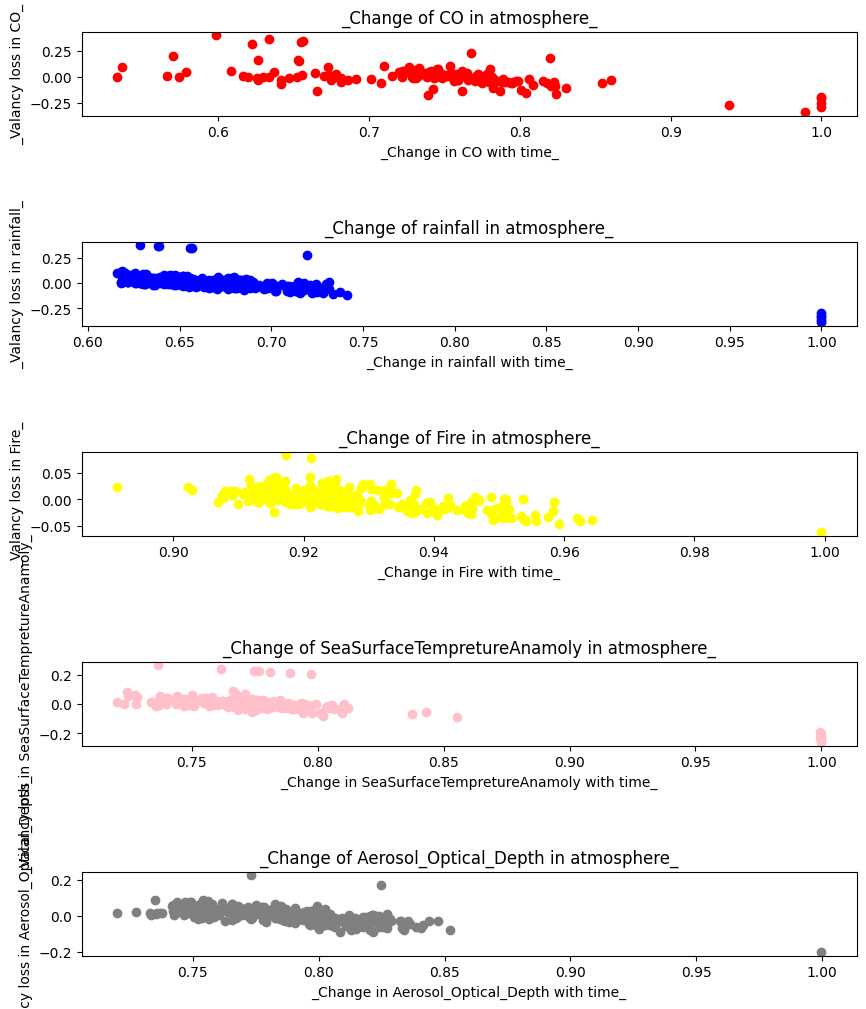

In [ ]:
import matplotlib.pyplot as plt
# Plotting the line chart

# Subplots with 5 rows and 1 column
plt.figure(figsize=(10, 12))  # Adjust figsize
plt.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots

# First subplot for co change loss
cmo_change_loss = []
base_change = 1
for changes in cmo_changes:
    cmo_change_loss.append(base_change-changes)
    base_change = changes
print(cmo_change_loss)
plt.subplot(5, 1, 1)
plt.scatter(cmo_changes, cmo_change_loss,color='red')
plt.xlabel('_Change in CO with time_')
plt.ylabel('_Valancy loss in CO_')
plt.title('_Change of CO in atmosphere_')

# Second subplot for rainfall_change_loss
rainfall_change_loss = []
base_change = 1
for changes in rf_changes:
    rainfall_change_loss.append(base_change-changes)
    base_change = changes
print(rainfall_change_loss)
plt.subplot(5, 1, 2)
plt.scatter(rf_changes, rainfall_change_loss,color='blue')
plt.xlabel('_Change in rainfall with time_')
plt.ylabel('_Valancy loss in rainfall_')
plt.title('_Change of rainfall in atmosphere_')

# Third subplot for Fire change loss
Fire_change_loss = []
base_change = 1
for changes in fi_changes:
    Fire_change_loss.append(base_change-changes)
    base_change = changes
print(Fire_change_loss)
plt.subplot(5, 1, 3)
plt.scatter(fi_changes, Fire_change_loss,color='yellow')
plt.xlabel('_Change in Fire with time_')
plt.ylabel('_Valancy loss in Fire_')
plt.title('_Change of Fire in atmosphere_')


# Fourth subplot for SeaSurfaceTempretureAnamoly change loss
SeaSurfaceTempretureAnamoly_change_loss = []
base_change = 1
for changes in ss_changes:
    SeaSurfaceTempretureAnamoly_change_loss.append(base_change-changes)
    base_change = changes
print(SeaSurfaceTempretureAnamoly_change_loss)
plt.subplot(5, 1, 4)
plt.scatter(ss_changes,SeaSurfaceTempretureAnamoly_change_loss,color='pink')
plt.xlabel('_Change in SeaSurfaceTempretureAnamoly with time_')
plt.ylabel('_Valancy loss in SeaSurfaceTempretureAnamoly_')
plt.title('_Change of SeaSurfaceTempretureAnamoly in atmosphere_')

# Fifth subplot for Aerosol Optical Depth change loss
Aerosol_Optical_Depth_change_loss = []
base_change = 1
for changes in od_changes:
    Aerosol_Optical_Depth_change_loss.append(base_change-changes)
    base_change = changes
print(Aerosol_Optical_Depth_change_loss)
plt.subplot(5, 1, 5)
plt.scatter(od_changes, Aerosol_Optical_Depth_change_loss,color='gray')
plt.xlabel('_Change in Aerosol_Optical_Depth with time_')
plt.ylabel('_Valancy loss in Aerosol_Optical_Depth_')
plt.title('_Change of Aerosol_Optical_Depth in atmosphere_')
plt.subplots_adjust(hspace=1.5)
# Displaying the subplots
plt.show()


# **Analysing the feedback to check human positiveness in the context of understanding the potantial impact on earth atmosphere in future because our current steps and understanding can impact earth health.**

1.   List item
2.   List item



In [ ]:
# Contaminating avg of all the questions asked by the peoples and understanding the potantial.
import pandas as pd
data = pd.read_csv('/content/EHS (Responses) - Form responses 1.csv')
df = pd.DataFrame(data)
total_question_classes = 12
questions = []
for que in df:
    questions.append(que)

question_list = []
total_feed_avg_sum = 0
question_wise_avg = []
for feedback_val in questions:
    if feedback_val in ['Timestamp', 'Other thoughts or comments']:
        continue
    question_list.append(feedback_val)
    curr_que_feed_sum = 0
    count = 0
    avg = 0
    for val in df[feedback_val]:
        curr_que_feed_sum += val
        count += 1
    avg = curr_que_feed_sum/count
    question_wise_avg.append(avg)
    total_feed_avg_sum += avg


print(len(question_wise_avg))
print(len(question_list))
print(total_feed_avg_sum/total_question_classes)
print(question_wise_avg)


12
12
3.935185185185185
[4.444444444444445, 4.333333333333333, 4.111111111111111, 4.333333333333333, 3.5555555555555554, 3.888888888888889, 4.0, 3.888888888888889, 3.5555555555555554, 3.888888888888889, 3.7777777777777777, 3.4444444444444446]


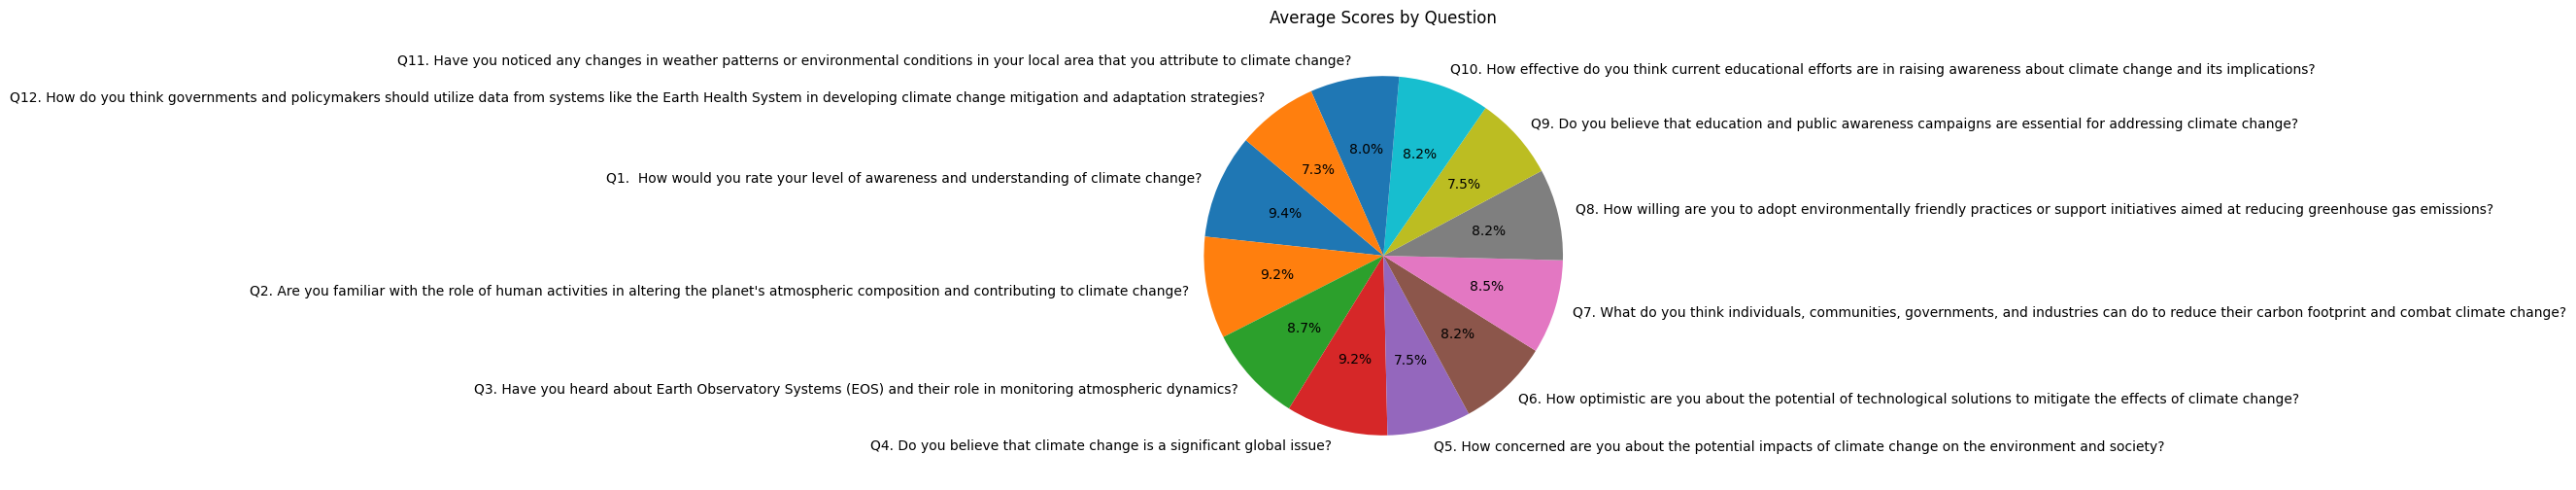

In [ ]:
import matplotlib.pyplot as plt

# Creating a pie plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(question_wise_avg, labels=question_list, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Average Scores by Question')

# Displaying the pie plot
plt.show()

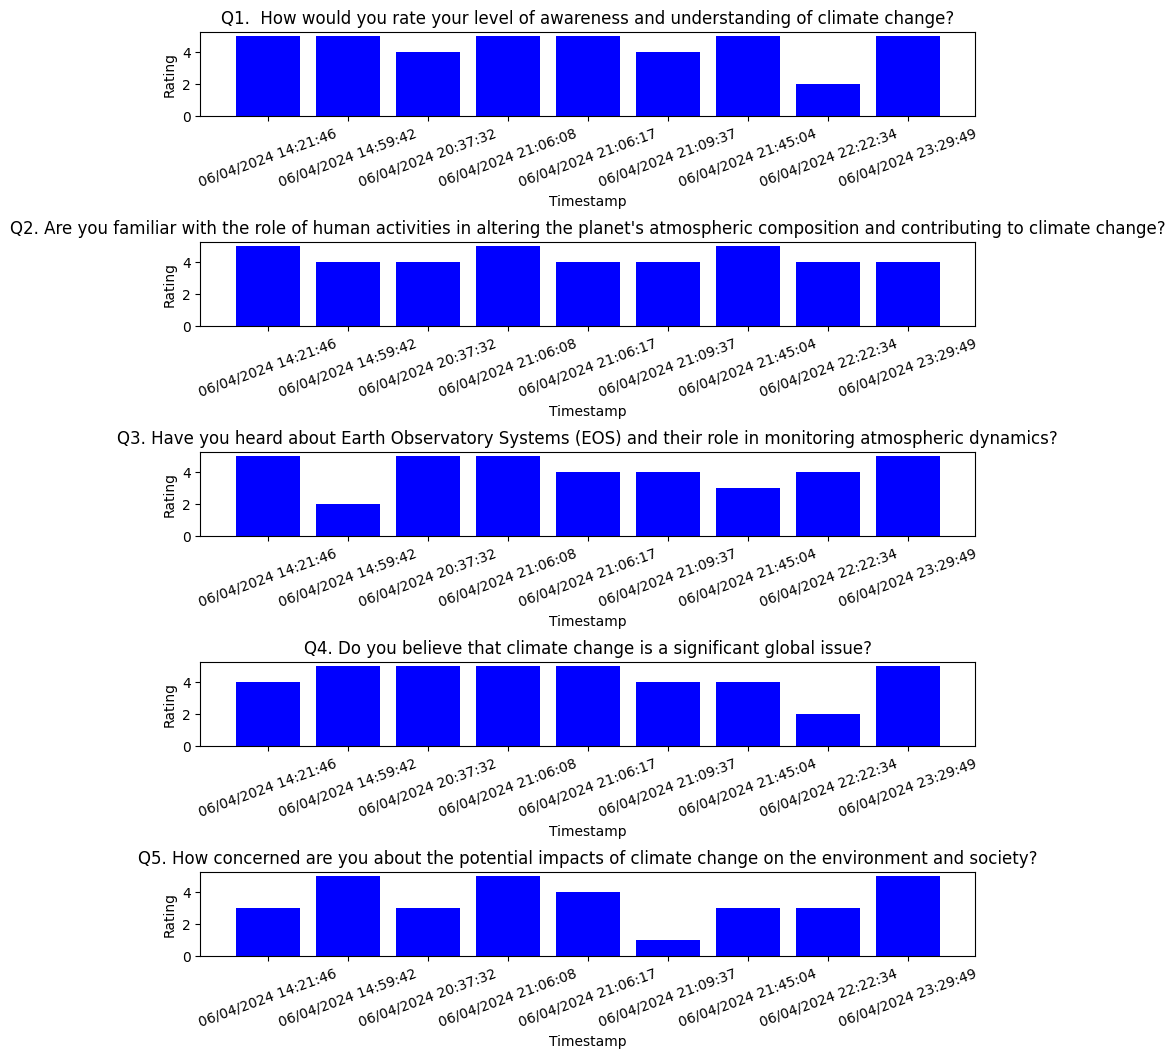

In [ ]:
# Creating bar plot for the questionaire

import matplotlib.pyplot as plt

# Creating subplots with 5 rows and 1 column
plt.figure(figsize=(10, 12))  # Adjust figsize as needed
plt.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots

date = df['Timestamp']
plot_count = 1
for que in question_list:
    plt.subplot(5, 1, plot_count)
    plt.bar(date, df[que], color='blue')  # Change color to blue for bars
    plt.title(que)
    plt.xlabel('Timestamp')
    plt.ylabel('Rating')
    plt.xticks(rotation=20)  # Rotate x-axis labels vertically
    if plot_count == 5:
        break
    plot_count += 1

# Adjusting spacing between subplots
plt.subplots_adjust(hspace=1.5)  # Increase or decrease the value as needed

# Displaying the subplots
plt.show()
